## Example of using the Jupyter magics for BigQuery

This is the recommended way to programmatically access BigQuery when you are in a notebook environment.

If you need to create a Python code that works outside of a notebook environment (e.g. in a production environment), you should use code as shown in the [Google Cloud Client Library example notebook](bigquery_cloud_client.ipynb) in this directory.

## Install library and extensions if needed

In [2]:
#!pip install google-cloud-bigquery
%load_ext google.cloud.bigquery

In [8]:
PROJECT='cloud-training-demos'  # CHANGE THIS

## Run a query

In [2]:
%%bigquery --project $PROJECT
SELECT 
  start_station_name 
  , AVG(duration) as duration
  , COUNT(duration) as num_trips
FROM `bigquery-public-data`.london_bicycles.cycle_hire 
GROUP BY start_station_name
ORDER BY num_trips DESC
LIMIT 5

,start_station_name,duration,num_trips
0,"Belgrove Street , King's Cross",1011.076696,234458
1,"Hyde Park Corner, Hyde Park",2782.730709,215629
2,"Waterloo Station 3, Waterloo",866.376135,201630
3,"Black Lion Gate, Kensington Gardens",3588.012004,161952
4,"Albert Gate, Hyde Park",2359.413930,155647


## Run a parameterized query

In [3]:
PARAMS = {"num_stations": 3}

In [4]:
%%bigquery --project $PROJECT --params $PARAMS
SELECT 
  start_station_name 
  , AVG(duration) as duration
  , COUNT(duration) as num_trips
FROM `bigquery-public-data`.london_bicycles.cycle_hire 
GROUP BY start_station_name
ORDER BY num_trips DESC
LIMIT @num_stations

,start_station_name,duration,num_trips
0,"Belgrove Street , King's Cross",1011.076696,234458
1,"Hyde Park Corner, Hyde Park",2782.730709,215629
2,"Waterloo Station 3, Waterloo",866.376135,201630


## Into a dataframe

In [5]:
%%bigquery df --project $PROJECT
SELECT 
  start_station_name 
  , AVG(duration) as duration
  , COUNT(duration) as num_trips
FROM `bigquery-public-data`.london_bicycles.cycle_hire 
GROUP BY start_station_name
ORDER BY num_trips DESC

In [6]:
df.describe()

,duration,num_trips
count,880.000000,880.000000
mean,1348.351153,27692.273864
std,434.057829,23733.621289
min,0.000000,1.000000
25%,1078.684974,13033.500000
50%,1255.889223,23658.500000
75%,1520.504055,35450.500000
max,4836.380090,234458.000000


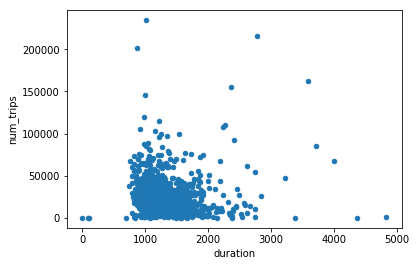

In [7]:
df.plot.scatter('duration', 'num_trips');

Copyright 2019 Google Inc. Licensed under the Apache License, Version 2.0 (the "License"); you may not use this file except in compliance with the License. You may obtain a copy of the License at http://www.apache.org/licenses/LICENSE-2.0 Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License